In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib notebook

In [2]:
data3 = pd.read_excel("C题数据.xlsx", "data3")
# 缺失值检验
print(data3[data3.isnull() == True].count())
# 重复实验取平均值
datalist = data3.groupby(data3.index//3).mean()
datalist

接收距离(cm)       0
热风速度(r/min)    0
厚度mm           0
孔隙率（%）         0
压缩回弹性率（%）      0
过滤阻力Pa         0
过滤效率（%）        0
透气性 mm/s       0
dtype: int64


,接收距离(cm),热风速度(r/min),厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s
0,40.0,800.0,2.759180,96.016300,84.793750,25.662185,49.778319,633.038666
1,40.0,900.0,3.049211,96.660930,85.320390,26.333693,47.499510,534.623954
2,40.0,1000.0,3.278972,96.909733,85.556427,21.851860,41.554806,498.196363
3,40.0,1100.0,3.422445,96.757311,85.033277,23.529135,42.446296,467.470763
4,40.0,1200.0,3.516909,96.721242,83.668346,23.946147,43.728958,439.155813
5,35.0,800.0,2.402686,95.959635,86.719183,31.260194,51.387358,423.224215
6,35.0,900.0,2.696144,96.405324,87.261357,27.879767,47.077028,456.939658
7,35.0,1000.0,2.921548,96.516558,87.297681,26.657212,46.213743,455.239437
8,35.0,1100.0,3.065953,96.391245,87.083865,22.489345,41.886722,510.450306
9,35.0,1200.0,3.158709,96.691105,85.713582,23.543627,43.495267,480.615908


<IPython.core.display.Javascript object>


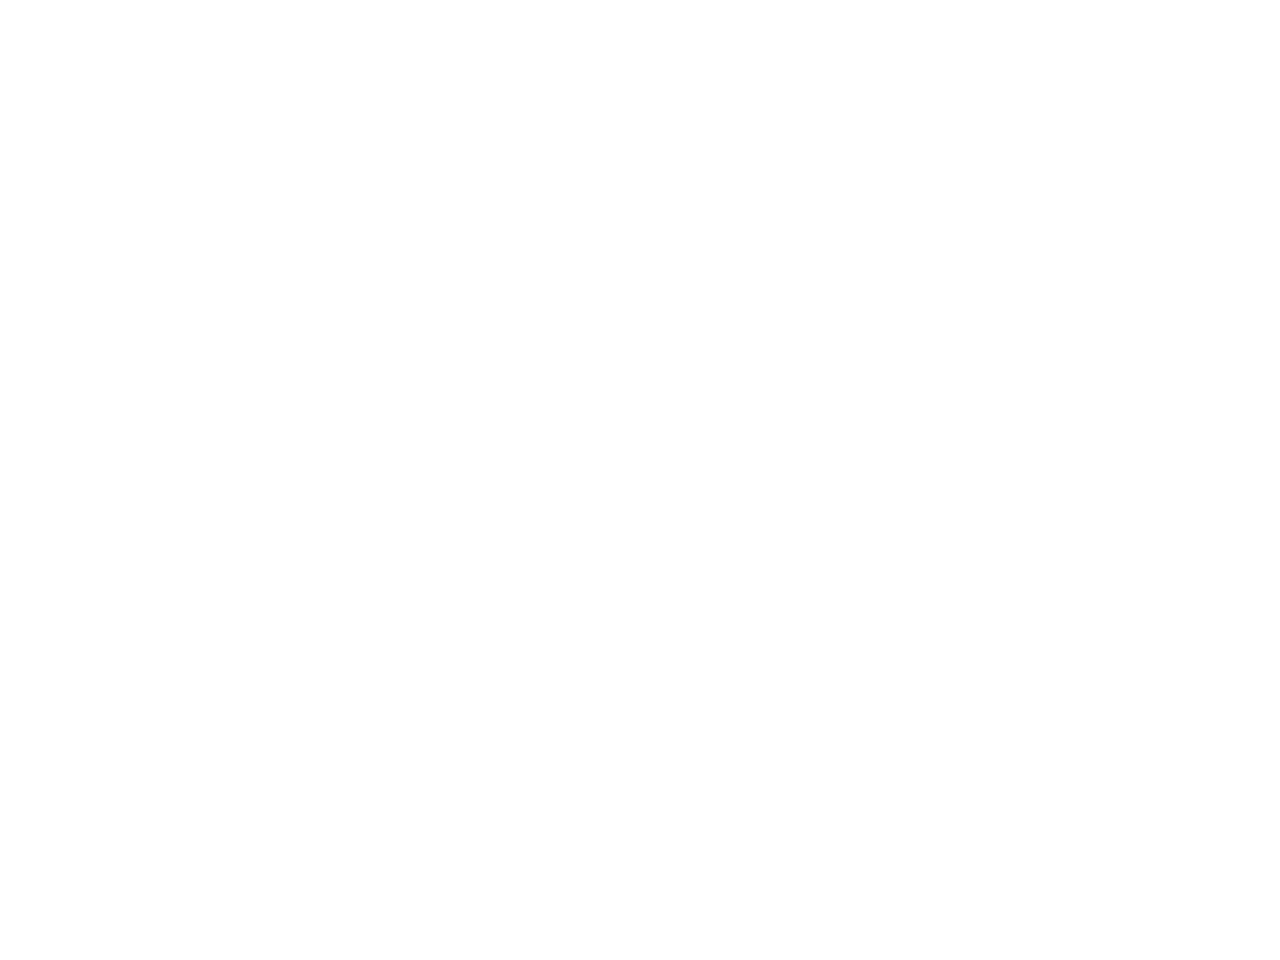

<IPython.core.display.Javascript object>


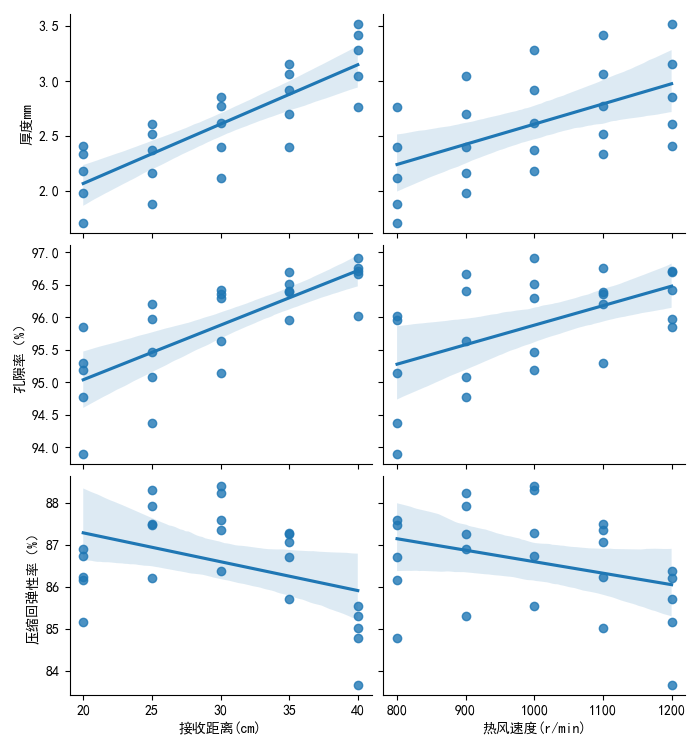

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(dpi = (200.0))
# 通过加入一个参数kind='reg'，seaborn可以添加一条最佳拟合直线和95%的置信带。
sns.pairplot(datalist, x_vars=['接收距离(cm)','热风速度(r/min)'], y_vars=['厚度mm','孔隙率（%）','压缩回弹性率（%）'], height=2.5, aspect=1.4,kind='reg')
plt.savefig("线性拟合.jpg")
plt.show()
#print(datalist.corr())
datalist.corr().to_excel("相关性表.xlsx")

In [26]:
# 多元线性回归
model = LinearRegression()
model.fit(datalist.iloc[:, :2], datalist.iloc[:, 2:5])
b = model.intercept_  # 截距
k = model.coef_  # 回归系数

print("最佳拟合线:截距=", b, ",回归系数=", k)

最佳拟合线:截距= [-0.86020507 90.34877411 91.4097781 ] ,回归系数= [[ 0.05419093  0.00184155]
 [ 0.08411778  0.00300685]
 [-0.06881512 -0.00273744]]


In [34]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print(mean_squared_error(datalist.iloc[:, 2:5], model.predict(datalist.iloc[:, :2])))
print(mean_absolute_error(datalist.iloc[:, 2:5], model.predict(datalist.iloc[:, :2])))
print(r2_score(datalist.iloc[:, 2:5], model.predict(datalist.iloc[:, :2])))
print(model.score(datalist.iloc[:, :2], datalist.iloc[:, 2:5]))
print(model.coef_) 
print(np.argsort(model.coef_)) 
# print(data3.feature_names[np.argsort(model.coef_)])

0.3736851560994294
0.3800595828321381
0.7065128850291443
0.7065128850291443
[[ 0.05419093  0.00184155]
 [ 0.08411778  0.00300685]
 [-0.06881512 -0.00273744]]
[[1 0]
 [1 0]
 [0 1]]
